In [1]:
import requests
import json
from pymongo import MongoClient
import pyriot
import matplotlib.pyplot as plt

In [2]:
jsonResponse = requests.get("https://s3-us-west-1.amazonaws.com/riot-developer-portal/seed-data/matches1.json").json()
jsonReponseItems = requests.get("http://ddragon.leagueoflegends.com/cdn/6.24.1/data/en_US/item.json").json()
jsonReponseMasteries = requests.get("http://ddragon.leagueoflegends.com/cdn/6.24.1/data/en_US/mastery.json").json()

In [3]:
client = MongoClient('MongoDB', 27017)
client.drop_database('riot')
db = client['riot']
matches = db['matches']
items = db['items']
masteries = db['masteries']

for x in range(len(jsonResponse['matches'])):
    matches.insert_one(jsonResponse['matches'][x])

items.insert_one(jsonReponseItems)
masteries.insert_one(jsonReponseMasteries)

# Requête 1: Items les plus utilisées

In [4]:
pyriot.most_used_items(matches,items)

['Warding Totem (Trinket)',
 'Oracle Alteration',
 'Ninja Tabi',
 'Infinity Edge',
 'Farsight Alteration',
 "Berserker's Greaves",
 "Mercury's Treads",
 "Sorcerer's Shoes",
 'The Black Cleaver',
 'Spirit Visage']

# Requête 2: Masteries les plus utilisées

In [5]:
pyriot.most_used_masteries(matches,masteries)

['Merciless',
 'Natural Talent',
 'Dangerous Game',
 'Fury',
 'Savagery',
 'Vampirism',
 'Secret Stash',
 'Fresh Blood',
 'Sorcery',
 'Tough Skin',
 'Wanderer']

# Requête 3: Nombre de jalons de visions placés en moyenne

In [6]:
pyriot.average_wards_placed(matches)

14.658000000000001

# Requête 4: Moyenne des dégâts totaux

In [7]:
pyriot.average_total_damage_dealt(matches)

154141.516

# Requête 5: Moyenne de nombre de kills d'affilés sans mourir

In [8]:
pyriot.average_largest_killing_spree(matches)

2.9850000000000003

# Requête 6: Moyenne de heal total par partie

In [9]:
pyriot.average_total_heal(matches)

7854.0

# Requête 7: Moyenne de sbires tués par parties

In [10]:
pyriot.average_total_minions_killed(matches)

148.724

# Requête 8: Golds gagnés

### Equipe bleue

In [11]:
pyriot.avg_earned_gold(100, matches)

70810.92

### Equipe rouge

In [12]:
pyriot.avg_earned_gold(200, matches)

72522.19

# Requête 9: Golds dépensés

### Equipe bleue

In [13]:
pyriot.avg_spent_gold(100, matches)

65671.26

### Equipe rouge

In [14]:
pyriot.avg_spent_gold(200, matches)

66563.1

# Requête 10: Dégats purs effectués

### Equipe bleue

In [15]:
pyriot.avg_true_Damage(100, matches)

33499.39

### Equipe rouge

In [16]:
pyriot.avg_true_Damage(200, matches)

32864.18

# Requête 11: Nombre de kills de l'équipe gagnante

In [17]:
pyriot.sum_kill_win(matches)

36.76

# Requête 12: Nombre de kills de l'équipe perdante (/100 parties)

In [18]:
pyriot.sum_kill_lost(matches)

34.33

# Requête 13: Nombre de first blood de l'équipe bleu (/100 parties)

In [19]:
pyriot.blue_team_first_blood(matches)

40

# Requête 14: Nombre de first blood de l'équipe rouge (/100 parties)

In [20]:
pyriot.red_team_first_blood(matches)

60

# Requête 15: Pourcentage de nashors tués

In [21]:
pyriot.avg_baron_kills(matches)

'53%'

# Requête 16: Total de sbires tuées sur 100 parties (/100 parties)

In [22]:
pyriot.sum_minions_killed(matches)

148724

# Requête 17: Moyenne du temps passé en vie (/100 parties)

In [23]:
pyriot.avg_living_time(matches)

12.052466666666668

# Requête 18 : Nombre de barons nashors tuées par partie

<BarContainer object of 100 artists>

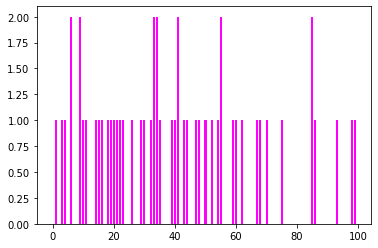

In [24]:
y = pyriot.graph_barons_kills(matches)
N = len(y)
x = range(N)
width = 1/1.5
plt.bar(x, y, width, color="magenta")

# Requête 19 : Nombre de sbires tuées par joueur

<BarContainer object of 1000 artists>

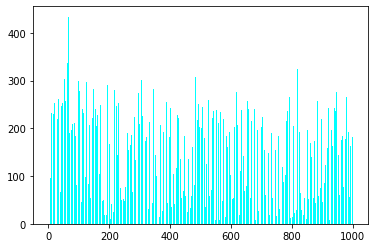

In [25]:
y = pyriot.graph_minions_killed(matches)
N = len(y)
x = range(N)
width = 1/1.5
plt.bar(x, y, width, color="cyan")

# Requête 20 : Nombre de Gold dépenser par joueur 

### Equipe bleu

<BarContainer object of 500 artists>

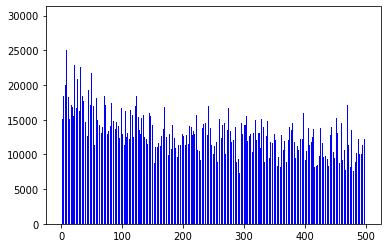

In [26]:
y = pyriot.graph_spent_gold(100,matches)
N = len(y)
x = range(N)
width = 1/1.5
plt.bar(x, y, width, color="blue")

### Equipe rouge

<BarContainer object of 500 artists>

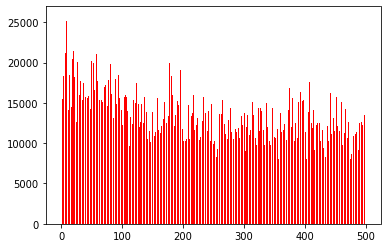

In [27]:
y = pyriot.graph_spent_gold(200,matches)
N = len(y)
x = range(N)
width = 1/1.5
plt.bar(x, y, width, color="red")